In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = np.genfromtxt('data.csv', delimiter = ',')

**Bring all data from data.csv file and assign this as a data variable.**

In [11]:
x = np.array(data[:,0])
y = np.array(data[:,1]) 

**We have 2 rows in data for this reason we call 2 data point which is 0 rows as a x axis and 1 rows as a y axis.**

***Draw charts***

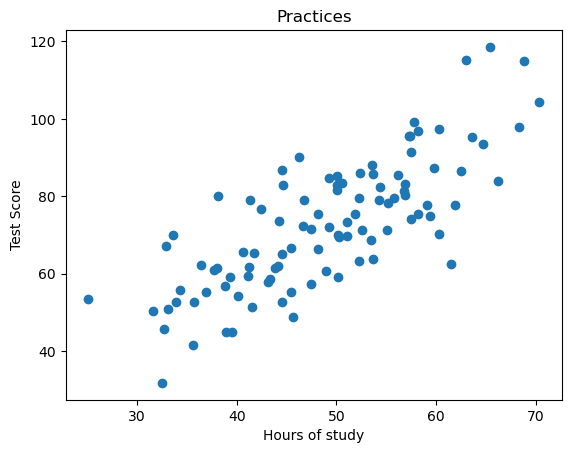

In [13]:
plt.scatter(x,y) # type of charts and coordinats.
plt.xlabel('Hours of study') #name of x-axis
plt.ylabel('Test Score') # name of y-axis
plt.title('Practices') # name of chart 
plt.show() # show the chart in screen

Explaining Practice Chart: We have lots of data points in the dataset. These data points are showing us student test scores and each student how much spend hours of study per month. We are gonna research each data point and get result and most effective hours for average student.

**We are gonna calculate manuaelly for practicing numpy and matlab.**
***(This mean we do not use any ml libs such as tensorflow, sklearn, etc.)***

**We need to define linear regression parameters :)**

In [14]:
# Linear Regression Parameters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

### Define our Cost Function
**It is really popular for machine learning algorithms. And shows to correct predicting for us.**

In [15]:
def cost_function(b,m, data):
    total_cost = 0 # Total cost is like storage for us.
    N = float(len(data)) # Return the all data point in our traning set. Data set could be float number ,so take all number from training set to find the best result.
    
    ## We need to find sum of squared errors , so we are gonna use for loop for each float points. Then we need to write inside of for loop square errors functions.
    ## Then take all number our storeage which name is total_cost..
    ## Let's do this!!!
    
    for index in range (0,len(data)): ## range from 0 tooo each data. take index..
        x = data[index, 0] ## Take the data from index to all  0  index elements
        y = data[index, 1] ## Take the data from index to all  1  index elements
        total_cost = total_cost + (y-(m * x + b)) **2 ## We did here our part of sum of cost function formula 
                                                      ## But also we need to divided by n of data points of nums.
        
    return total_cost/N ## Here finally did all formulas and calculation for cost function but not enough to see linear reg..

## Define Gradient Descent Functions

**In this way we can know our line slope and more...**

In [19]:
def gradient_descent(points, startingb, startingm, learning_rate, num_iterations):
    b = startingb
    m = startingm
    cost_graph = []
    
    # For we need to optimize and compute again for each b,m and their cost.
    # For this we need to use for loop.
    for index in range(num_iterations):
        cost_graph.append(cost_function(b,m, data)) ## other warehouse to hold data points
        b, m = step_gradient(b,m, np.array(data),learning_rate)
    return [b,m, cost_graph]

def step_gradient(b_current, m_current, data, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(data))
    ## gradient descent formula
    for index in range(0, len(data)):
            x = data[index, 0]
            y = data[index, 1]
            m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
            b_gradient += - (2/N) * (y - (m_current * x + b_current))
                  
    ## Update current m and b for each step until the find good position 
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient
                  
    return b_updated, m_updated
                 

## Let's check the optimized parameters!!

In [21]:
b, m, cost_graph = gradient_descent(data, initial_b, initial_m, learning_rate,num_iterations)
print('Optimized b: ', b)
print('Optimized m: ', m)
## Check the sqare error wih optimized parameters!

print('Minimized cost: ',cost_function(b, m, data))

Optimized b:  0.02963934787473239
Optimized m:  1.4774173755483797
Minimized cost:  112.65585181499746


## Show the Cost function per iteration 

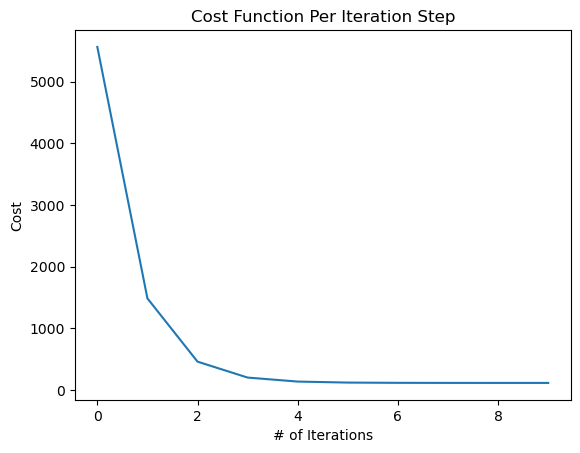

In [23]:
plt.plot(cost_graph)
plt.xlabel('# of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Per Iteration Step')
plt.show()

***Our gradient descent converges to local min point after 5 iterations because slope will be like a line...***

# Finally, the best fit of linear Regression model we can draw in scatter charts.!

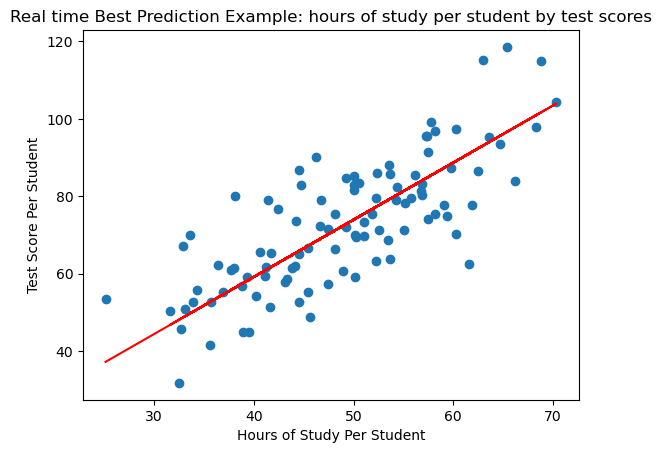

In [24]:
# take traning set from data.
plt.scatter(x,y)
# predict y values
prediction = m *x +b
# draw the linear line.
plt.plot(x, prediction, c='r')
plt.xlabel('Hours of Study Per Student')
plt.ylabel('Test Score Per Student')
plt.title('Real time Best Prediction Example: hours of study per student by test scores')
plt.show()

***If the new prediction test score come with somewhere in 60-80, we can predict their best of hours study time. Example if the student take the 70 score, he studied almost 50 hours per months.***